# Dataset boolean5: AP conjoined by and

Generating sentences of the form

- 1) **c created a(n) P and Q work of art, c didn't create a(n) P (Q) work of art** (contradiction)

- 2) **c created a(n) P and Q work of art, c (d) didn't create a(n) W (P, Q)  work of art** (non-contradiction)

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, all_attributes
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
upper_bound = 11000 / 2
vowels = 'aeiou'

### Generating all types of sentences

- 1) **c created a(n) P and Q work of art, c didn't create a(n) P (Q) work of art** (contradiction)

In [4]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    pred1 = get_new_item([], all_attributes)
    pred2 = get_new_item([pred1], all_attributes)
    if pred1[0] in vowels:
        preposition1 = "an"
    else:
        preposition1 = "a"
    if pred2[0] in vowels:
        preposition2 = "an"
    else:
        preposition2 = "a"
    if i % 2 == 0:
        preposition3 = preposition1
        pred3 = pred1
    else:
        preposition3 = preposition1
        pred3 = pred1
    sentence = "{} created {} {} and {} work of art, {} didn't create {} {} work of art".format(person,
                                                                                                preposition1,
                                                                                                pred1,
                                                                                                pred2,
                                                                                                person,
                                                                                                preposition3,
                                                                                                pred3)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Darren created a beautiful and better work of art', " Darren didn't create a beautiful work of art", 1]
['Eunice created a polite and chubby work of art', " Eunice didn't create a polite work of art", 1]
['Rosa created a bewildered and shy work of art', " Rosa didn't create a bewildered work of art", 1]
['Raymond created a blue and agreeable work of art', " Raymond didn't create a blue work of art", 1]
['Dolores created a plump and obedient work of art', " Dolores didn't create a plump work of art", 1]
['Adrian created a thankful and better work of art', " Adrian didn't create a thankful work of art", 1]
['Kristina created a helpful and itchy work of art', " Kristina didn't create a helpful work of art", 1]
['Herman created a bewildered and shapely work of art', " Herman didn't create a bewildered work of art", 1]
['Jaime created a happy and defeated work of art', " Jaime didn't create a happy work of art", 1]
['Rosie created a salmon and plain work of art', " Rosie didn't create a s

- 2) **c created a(n) P and Q work of art, c (d) didn't create a(n) W (P, Q)  work of art** (non-contradiction)

In [5]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    new_person = get_new_item([person], name_list)
    pred1 = get_new_item([], all_attributes)
    pred2 = get_new_item([pred1], all_attributes)
    pred3 = get_new_item([pred1, pred2], all_attributes)
    
    if pred1[0] in vowels:
        preposition1 = "an"
    else:
        preposition1 = "a"
    if pred2[0] in vowels:
        preposition2 = "an"
    else:
        preposition2 = "a"
    if pred3[0] in vowels:
        preposition3 = "an"
    else:
        preposition3 = "a"
    if i % 3 == 0:
        new_preposition = preposition1
        new_pred = pred1
        other = new_person
    elif i % 3 == 1:
        new_preposition = preposition2
        new_pred = pred2
        other = new_person
    else:
        new_preposition = preposition3
        new_pred = pred3
        other = person
    sentence = "{} created {} {} and {} work of art, {} didn't create {} {} work of art".format(person,
                                                                                                preposition1,
                                                                                                pred1,
                                                                                                pred2,
                                                                                                other,
                                                                                                new_preposition,
                                                                                                new_pred)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(",") + [0] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Sandra created a nervous and obedient work of art', " Willie didn't create a nervous work of art", 0]
['Carolyn created a gentle and faithful work of art', " Andrea didn't create a faithful work of art", 0]
['Mark created a kind and unsightly work of art', " Mark didn't create an attractive work of art", 0]
['Curtis created a stocky and plain work of art', " Micheal didn't create a stocky work of art", 0]
['Jose created a fancy and panicky work of art', " Roger didn't create a panicky work of art", 0]
['Edward created a powerful and mysterious work of art', " Edward didn't create a clumsy work of art", 0]
['Terrance created an eager and mysterious work of art', " Casey didn't create an eager work of art", 0]
['Cindy created an elegant and lemon work of art', " Misty didn't create a lemon work of art", 0]
['Diana created an embarrassed and delightful work of art', " Diana didn't create an eager work of art", 0]
['Edna created an ashy and alive work of art', " Benjamin didn't create an

In [6]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)

size1 = len(all_sentences_1)
size2 = len(all_sentences_2)

all_sentences = all_sentences_1 + all_sentences_2
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("total size = {}".format(size))

type 1 size = 5500
type 2 size = 5500
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [7]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Sonia created a dazzling and hallowed work of art,Sonia didn't create a dazzling work of art,1
10996,Margaret created an ashy and odd work of art,Margaret didn't create an ashy work of art,1
10997,Kathy created an ashy and easy work of art,Elizabeth didn't create an easy work of art,0
10998,David created a happy and angry work of art,David didn't create a happy work of art,1
10999,Calvin created a green and bewildered work of art,Marie didn't create a bewildered work of art,0


#### Looking at the label distribution

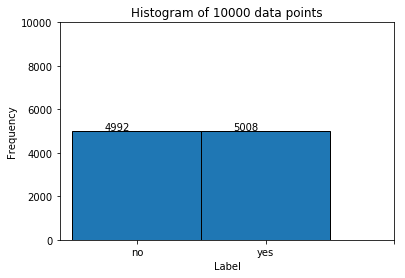

In [8]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean5_train.png")

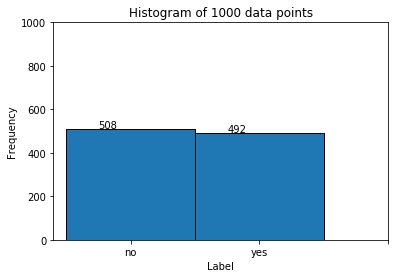

In [9]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean5_test.png")

### Saving to CSV

In [10]:
df_train.to_csv("boolean5_train.csv", index=False)
df_test.to_csv("boolean5_test.csv", index=False)